In [1]:
%matplotlib notebook
import seaborn as sns
import pandas as pd
import subject_DM
import helpers
import numpy as np
import collections

Loaded entropies from file (S=15000, entropy_bins=50)!
Loaded dot-level measures from file (S=2000, Smin=20)!


# Checking correlation between possible regressors

<IPython.core.display.Javascript object>


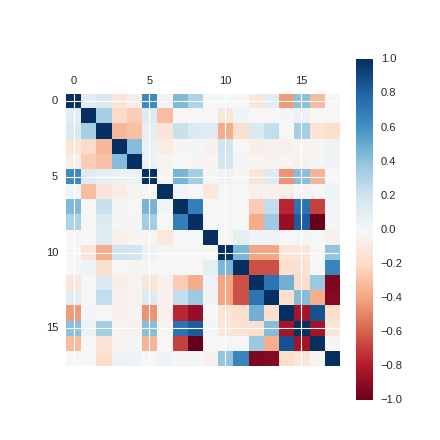

0                      correct
1                           RT
2                      entropy
3                   is_correct
4             is_correct_ideal
5                     response
6                   trial_time
7              correct_ideal_5
8                      dot_x_5
9                      dot_y_5
10           support_correct_5
11    support_previous_ideal_5
12               loglik_left_5
13              loglik_right_5
14              logpost_left_5
15             logpost_right_5
16           m_evidence_left_5
17                  surprise_5
dtype: object

In [2]:
subjects = 2
dots = 5

DM = subject_DM.get_trial_DM(dots, subjects, r_names='all')
img = sns.plt.matshow(DM.corr(), cmap='RdBu', vmin=-1, vmax=1)
sns.plt.colorbar()
img.figure.set_label('subject %d' % subjects)
pd.Series(DM.columns)

<IPython.core.display.Javascript object>


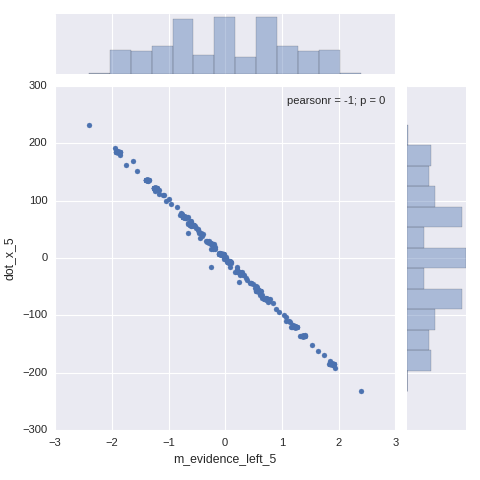

In [3]:
sns.jointplot('m_evidence_left_5', 'dot_x_5', data=DM);

<IPython.core.display.Javascript object>


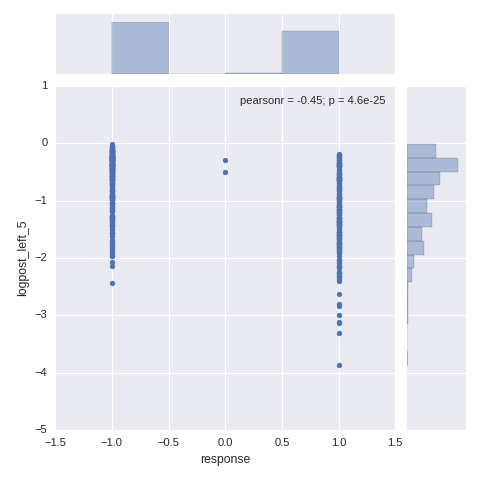

In [4]:
sns.jointplot('response', 'logpost_left_5', data=DM);

## Selection of regressors with low correlations

<IPython.core.display.Javascript object>


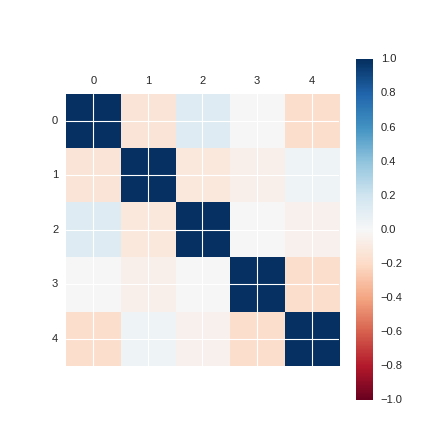

0           entropy
1        trial_time
2           dot_y_5
3    logpost_left_5
4        surprise_5
dtype: object

In [5]:
DM_lowr = subject_DM.get_trial_DM(dots, subjects, r_names=
        ['dot_y', 'surprise', 'logpost_left', 'entropy', 'trial_time'])
img = sns.plt.matshow(DM_lowr.corr(), cmap='RdBu', vmin=-1, vmax=1)
sns.plt.colorbar()
img.figure.set_label('subject %d' % subjects)
pd.Series(DM_lowr.columns)

### Checking correlation of these regressors across all subjects

In [6]:
DM_all = subject_DM.get_trial_DM(dots, r_names=
        ['dot_y', 'surprise', 'dot_x', 'entropy', 'trial_time'])
corrs = pd.concat([DM_all.loc[sub].corr() for sub in DM_all.index.levels[0]],
                  keys=DM_all.index.levels[0], names=['subject', 'regressor'])
corrs[corrs==1.] = np.nan
corrs.describe()

,entropy,trial_time,dot_x_5,dot_y_5,surprise_5
count,144.000000,144.000000,1.440000e+02,1.440000e+02,144.000000
mean,-0.012520,0.001189,-9.365512e-03,2.410197e-02,-0.043264
std,0.123560,0.047295,7.263361e-02,6.709792e-02,0.070965
min,-0.424242,-0.154099,-4.242416e-01,-1.079362e-01,-0.227120
25%,-0.101209,-0.025479,-1.519696e-02,-2.699053e-02,-0.056457
50%,-0.000813,0.004865,7.695095e-18,7.695095e-18,-0.032030
75%,0.096518,0.031884,1.253729e-02,6.783512e-02,0.002832
max,0.234290,0.107995,2.342896e-01,1.987541e-01,0.107995


<IPython.core.display.Javascript object>


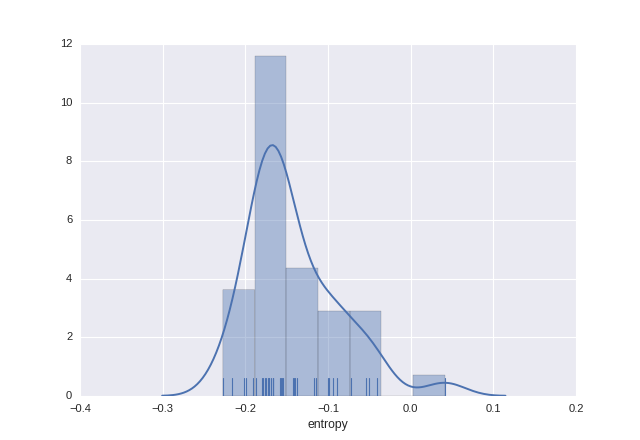

/home/bitzer/programs/anaconda/envs/python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [7]:
sns.plt.figure()
sns.distplot(corrs.xs('surprise_5', level='regressor').entropy, rug=True);

## Checking correlations across dots

<IPython.core.display.Javascript object>


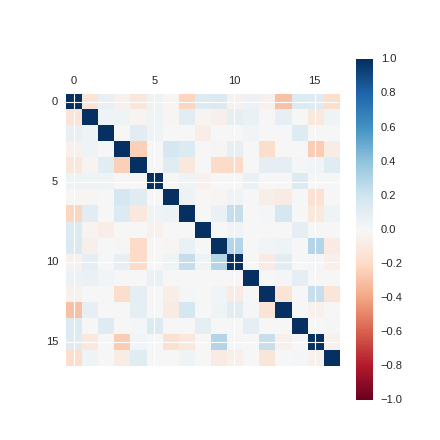

0        entropy
1     trial_time
2        dot_x_1
3        dot_y_1
4     surprise_1
5        dot_x_2
6        dot_y_2
7     surprise_2
8        dot_x_3
9        dot_y_3
10    surprise_3
11       dot_x_4
12       dot_y_4
13    surprise_4
14       dot_x_5
15       dot_y_5
16    surprise_5
dtype: object

In [8]:
sub = 2
DM = subject_DM.get_trial_DM(dots=np.arange(1, 6), subjects=sub, r_names=['dot_y', 
            'surprise', 'dot_x', 'entropy', 'trial_time'])

img = sns.plt.matshow(DM.corr(), cmap='RdBu', vmin=-1, vmax=1)
sns.plt.colorbar()
img.figure.set_label('subject %d' % sub)
pd.Series(DM.columns)

### for all subjects

In [9]:
corrs = pd.concat([DM.loc[sub].corr() for sub in DM.index.levels[0]],
                  keys=DM.index.levels[0], names=['subject', 'regressor'])
corrs[corrs==1.] = np.nan
print('overall min=%5.2f, max=%5.2f' % (corrs.min().min(), corrs.max().max()))
corrs.describe()

overall min=-0.29, max= 0.30


,entropy,trial_time,dot_x_1,dot_y_1,surprise_1,dot_x_2,dot_y_2,surprise_2,dot_x_3,dot_y_3,surprise_3,dot_x_4,dot_y_4,surprise_4,dot_x_5,dot_y_5,surprise_5
count,16.000000,16.000000,1.600000e+01,1.600000e+01,16.000000,1.600000e+01,1.600000e+01,16.000000,1.600000e+01,1.600000e+01,16.000000,1.600000e+01,1.600000e+01,16.000000,1.600000e+01,1.600000e+01,16.000000
mean,-0.020735,0.010856,2.245519e-02,-2.280270e-02,-0.018117,2.081988e-02,2.723877e-03,0.028916,8.145923e-03,3.165323e-02,0.033387,2.231705e-02,-1.603468e-02,-0.001688,3.894209e-02,-3.688109e-04,-0.018467
std,0.136186,0.069180,4.794676e-02,1.182370e-01,0.118896,4.117557e-02,7.518390e-02,0.111144,4.776778e-02,1.246205e-01,0.117888,3.156492e-02,9.574621e-02,0.108150,5.630916e-02,1.350801e-01,0.070168
min,-0.291742,-0.129165,-6.409052e-02,-2.545915e-01,-0.237324,-4.364428e-02,-1.513824e-01,-0.216433,-6.409052e-02,-1.945545e-01,-0.197471,-5.596271e-18,-1.758232e-01,-0.291742,-6.064485e-03,-2.545915e-01,-0.173108
25%,-0.116925,-0.024050,-1.079199e-17,-4.853524e-02,-0.107609,-4.028734e-17,-1.706010e-02,-0.001872,-3.747226e-03,-1.471886e-02,-0.016009,3.562332e-17,-6.799843e-02,-0.013928,4.387100e-18,-6.060924e-02,-0.054031
50%,-0.029583,0.019155,6.072447e-04,-5.566578e-18,0.003315,8.755844e-04,-1.043681e-17,0.032804,9.115641e-19,2.521267e-17,0.006783,4.863443e-03,-2.489151e-17,0.001352,4.227927e-03,1.103009e-17,0.002999
75%,0.087640,0.051540,4.148006e-02,1.023055e-02,0.094639,4.194182e-02,1.113945e-02,0.077613,3.495215e-03,4.584067e-02,0.087769,3.715289e-02,5.129685e-03,0.049638,9.388599e-02,1.670537e-02,0.009720
max,0.146297,0.113571,1.260788e-01,1.787990e-01,0.119114,1.335850e-01,1.787990e-01,0.236960,1.353982e-01,2.953103e-01,0.293891,9.332673e-02,2.322786e-01,0.175747,1.401887e-01,2.953103e-01,0.119114


### Logpost_left

<IPython.core.display.Javascript object>


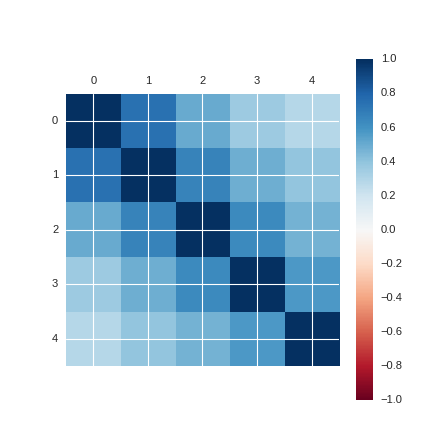

0    logpost_left_1
1    logpost_left_2
2    logpost_left_3
3    logpost_left_4
4    logpost_left_5
dtype: object

In [10]:
DM = subject_DM.get_trial_DM(dots=np.arange(1, 6), subjects=sub, r_names=['logpost_left'])

img = sns.plt.matshow(DM.corr(), cmap='RdBu', vmin=-1, vmax=1)
sns.plt.colorbar()
img.figure.set_label('subject %d' % sub)
pd.Series(DM.columns)